# Import function of interest

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from PIL import Image, ImageStat
import math
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set your path(s)...!!!

In [2]:
## This is the path of the "first full" dataset
csv_full = "/Users/Adrien/DataScientist/projet_Mushroom/data_first_model.csv"

folder_data = "/Users/Adrien/DataScientist/projet_Mushroom/images_mushroom/"

### Load csv_full

In [ ]:
df = pd.read_csv(csv_full)

### Read an example (set i to get the i image)

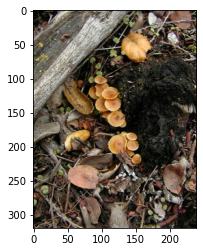

In [3]:
## Change the i to get another image !
i = 0

filepath = folder_data + str(df['image_id'][i]) + ".jpg"

im = tf.io.read_file(filepath)
im = tf.image.decode_jpeg(im, channels=3)
plt.imshow(im);

# "brightness" is a function to get the image brightness...

In [4]:
def brightness( im_file ):
    im = Image.open(im_file).convert('L')
    stat = ImageStat.Stat(im)
    return stat.mean[0]

## Get the image brightness for all images

(attention, code qui demande quelques minutes d'execution...)

In [5]:
bright = []
for name in tqdm(df['image_id']):
    filepath = folder_data + str(name) + ".jpg"
    bright.append(brightness(filepath))

df['brightness'] = bright
df.head()


100%|██████████| 120407/120407 [09:45<00:00, 205.75it/s]


,image_id,image_url,family,brightness
0,5,http://mushroomobserver.org/images/320/5,Mycenaceae,81.001589
1,6,http://mushroomobserver.org/images/320/6,Mycenaceae,36.015560
2,7,http://mushroomobserver.org/images/320/7,Boletaceae,48.599701
3,8,http://mushroomobserver.org/images/320/8,Boletaceae,97.225052
4,9,http://mushroomobserver.org/images/320/9,Boletaceae,77.447148


### plot the brigthness distribition for all famillies

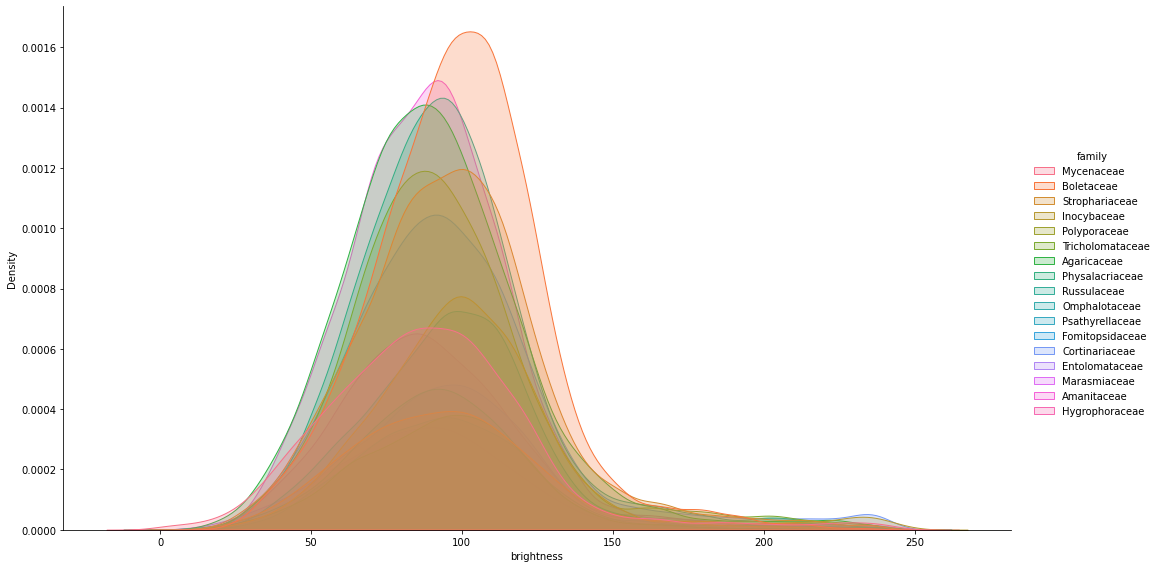

In [6]:
sns.displot(data=df, x='brightness', hue='family', kind='kde', fill=True, height=8, aspect=1.8)
plt.show();

# Save csv if you want !

(to keep a trace of image brightness)

In [7]:
### Replace saving path !
##
#
saving_path = "/Users/Adrien/DataScientist/projet_Mushroom/data_first_model_w_brightness.csv"
#
##
###

#df.to_csv(saving_path, index = False)

### Do the analysis on the reduced dataset (5 families)

In [8]:
liste = ['Inocybaceae','Omphalotaceae','Fomitopsidaceae','Physalacriaceae','Marasmiaceae']
df2 = df[df['family'].isin(liste)]
df2 = df2.reset_index(drop=True)

df2.head()

,image_id,image_url,family,brightness
0,28,http://mushroomobserver.org/images/320/28,Inocybaceae,75.566003
1,86,http://mushroomobserver.org/images/320/86,Physalacriaceae,49.052826
2,87,http://mushroomobserver.org/images/320/87,Physalacriaceae,64.822187
3,126,http://mushroomobserver.org/images/320/126,Omphalotaceae,72.267656
4,128,http://mushroomobserver.org/images/320/128,Omphalotaceae,83.343268


## On a bien une belle distribution de la brightness par famille

c'est "marrant"... chez les Inocybaceae on aurait presque un second petit pic avec des images plus lumineuses

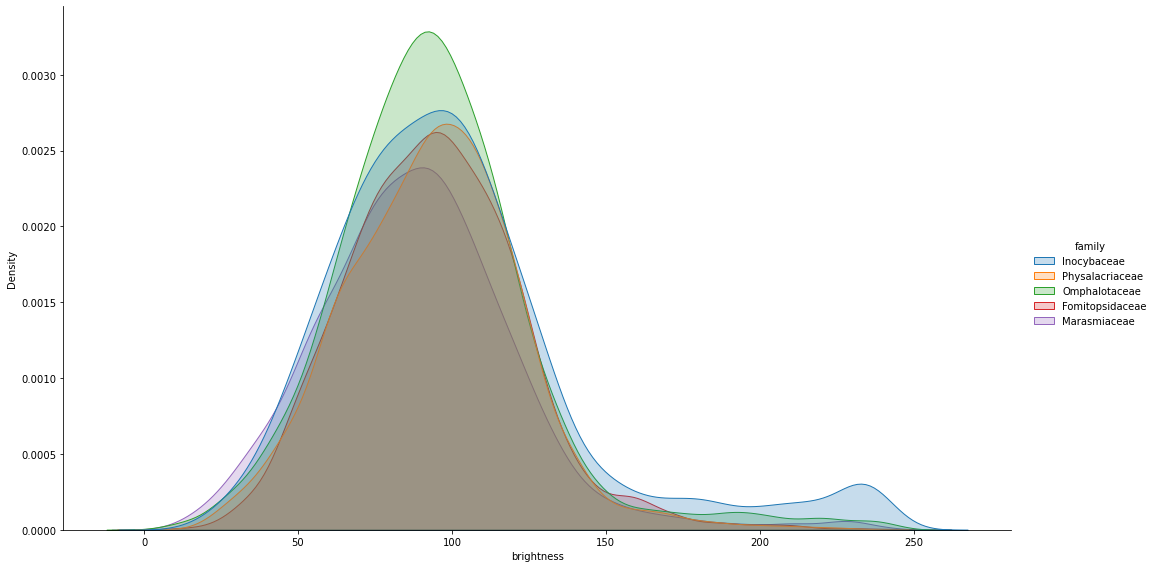

In [9]:
sns.displot(data=df2, x='brightness', hue='family', kind='kde', fill=True, height=8, aspect=1.8)
plt.show();